# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities


Number of cities in the list: 596


['adamstown',
 'tiksi',
 'huarmey',
 'qaqortoq',
 'vilyuysk',
 'grytviken',
 'port elizabeth',
 'port macquarie',
 'bernardo de irigoyen',
 'invercargill',
 'fujin',
 'yellowknife',
 'hualien city',
 'thompson',
 "nar'yan-mar",
 'wajir',
 'port-aux-francais',
 'labrador city',
 'holyhead',
 'puerto natales',
 'stanley',
 'puerto ayora',
 'natal',
 'santana',
 'komsomolets',
 'blackmans bay',
 'ilulissat',
 'vila franca do campo',
 'saipan',
 'mejit',
 'alotau',
 'bethel',
 'susuman',
 'ushuaia',
 'kapuskasing',
 'hendek',
 'edinburgh of the seven seas',
 'bonthe',
 'rio grande',
 'ola',
 'iqaluit',
 'albany',
 'whitehorse',
 'fort bragg',
 'papatowai',
 'jamestown',
 'sheridan',
 'yarmouth',
 'kharp',
 'bayanhongor',
 'morant bay',
 'balykshi',
 'vilyuchinsk',
 'casper',
 'klyuchi',
 'yatou',
 'aral',
 'thinadhoo',
 'arys',
 'quelimane',
 'punta arenas',
 'celldomolk',
 'yakeshi',
 'talnakh',
 'hami',
 'iskateley',
 'tamanrasset',
 'port blair',
 'safford',
 'okhotsk',
 'holualoa',
 'z

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + "imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
    
        city_lng = city_weather['coord']['lon']
        
        city_max_temp = city_weather['main']['temp_max']
        
        city_humidity = city_weather['main']['humidity']
        
        city_clouds = city_weather['clouds']['all']
        
        city_wind = city_weather['wind']['speed']
        
        city_country = city_weather['sys']['country']
        
        city_date = city_weather['dt']

        
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | huarmey
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | vilyuysk
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | port macquarie
Processing Record 9 of Set 1 | bernardo de irigoyen
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | fujin
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | hualien city
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | nar'yan-mar
Processing Record 16 of Set 1 | wajir
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | labrador city
Processing Record 19 of Set 1 | holyhead
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | stanley
Processing Record 22 of Set 1 | puerto 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,74.46,62,94,26.19,PN,1711845573
1,tiksi,71.6872,128.8694,9.03,77,100,15.82,RU,1711845614
2,huarmey,-10.0681,-78.1522,74.14,83,90,7.56,PE,1711845636
3,qaqortoq,60.7167,-46.0333,23.92,86,88,1.95,GL,1711845583
4,vilyuysk,63.7553,121.6247,5.00,91,61,4.00,RU,1711845807


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,74.46,62,94,26.19,PN,1711845573
1,tiksi,71.6872,128.8694,9.03,77,100,15.82,RU,1711845614
2,huarmey,-10.0681,-78.1522,74.14,83,90,7.56,PE,1711845636
3,qaqortoq,60.7167,-46.0333,23.92,86,88,1.95,GL,1711845583
4,vilyuysk,63.7553,121.6247,5.00,91,61,4.00,RU,1711845807


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

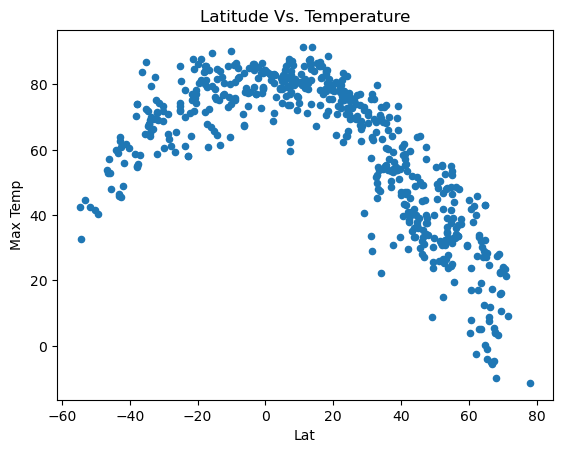

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", title="Latitude Vs. Temperature")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

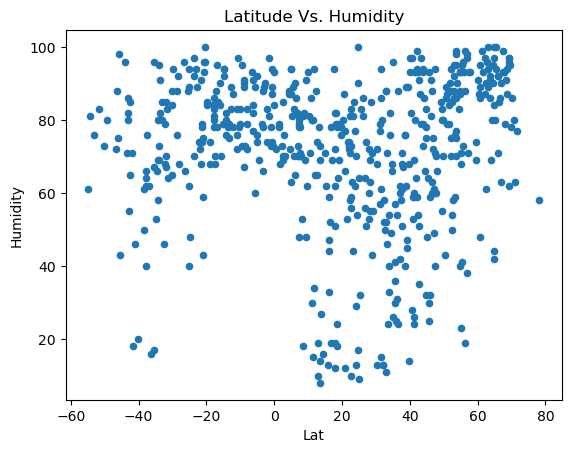

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", title="Latitude Vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

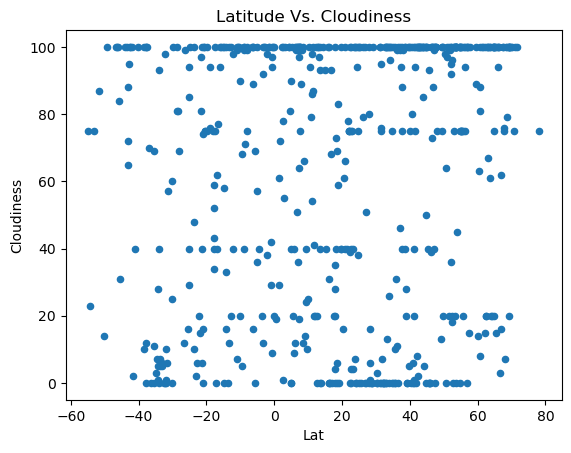

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", title="Latitude Vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

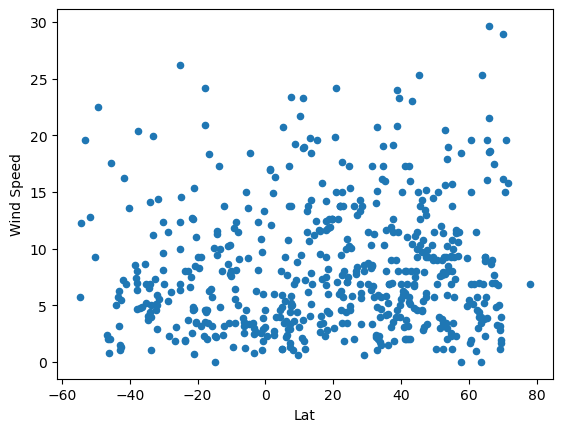

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation is: {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']>=0)])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tiksi,71.6872,128.8694,9.03,77,100,15.82,RU,1711845614
3,qaqortoq,60.7167,-46.0333,23.92,86,88,1.95,GL,1711845583
4,vilyuysk,63.7553,121.6247,5.00,91,61,4.00,RU,1711845807
10,fujin,47.2600,132.0322,34.11,49,99,15.14,CN,1711845808
11,yellowknife,62.4560,-114.3525,27.41,61,20,5.75,CA,1711845808


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']<0)])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,74.46,62,94,26.19,PN,1711845573
2,huarmey,-10.0681,-78.1522,74.14,83,90,7.56,PE,1711845636
5,grytviken,-54.2811,-36.5092,32.67,81,23,12.26,GS,1711845613
6,port elizabeth,-33.9180,25.5701,65.10,95,0,6.91,ZA,1711845807
7,port macquarie,-31.4333,152.9167,74.34,64,57,5.57,AU,1711845808


###  Temperature vs. Latitude Linear Regression Plot

The correlation is: -0.89
The r-squared is: 0.7992695772490142


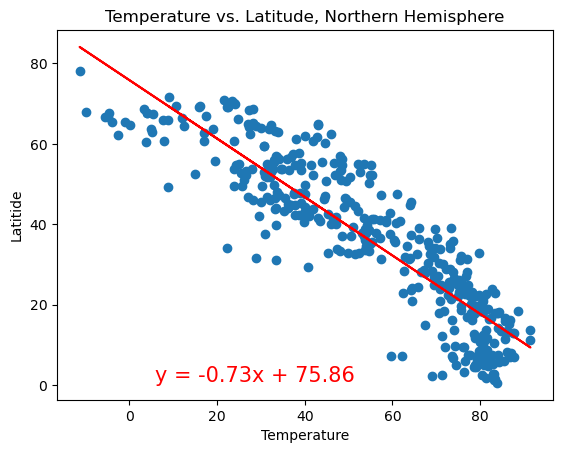

In [15]:
# Linear regression on Northern Hemisphere
plt.title("Temperature vs. Latitude, Northern Hemisphere")
plt.xlabel("Temperature")
plt.ylabel("Latitide")
linear_regression(northern_hemi_df["Max Temp"], northern_hemi_df["Lat"])


The correlation is: 0.75
The r-squared is: 0.555454556675207


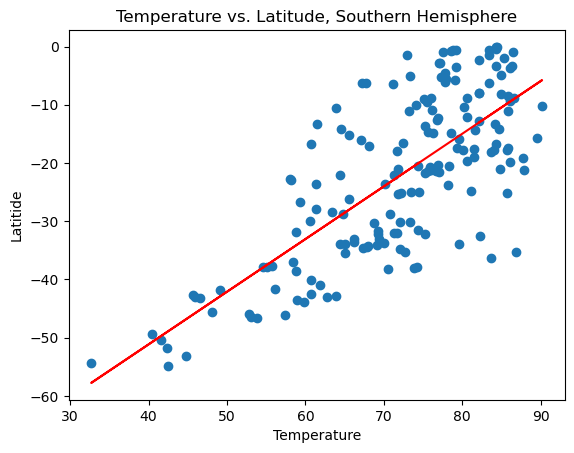

In [16]:
# Linear regression on Southern Hemisphere
plt.title("Temperature vs. Latitude, Southern Hemisphere")
plt.xlabel("Temperature")
plt.ylabel("Latitide")
linear_regression(southern_hemi_df["Max Temp"], southern_hemi_df["Lat"])

**Discussion about the linear relationship:** There is a strong correlation between Latitude and Max Temps. There is a consistent decrease in Max Temps the further away you get from the equator as shown by lower temperature values for higher positive or negative latitudes in the northern and southern hemispheres, respectively. The graphs appear to oppose each other but are illustrating the same thing. The difference is the scale of latitude in positive of negative numbers north and south of the equator. 

### Humidity vs. Latitude Linear Regression Plot

The correlation is: 0.26
The r-squared is: 0.06871391959451328


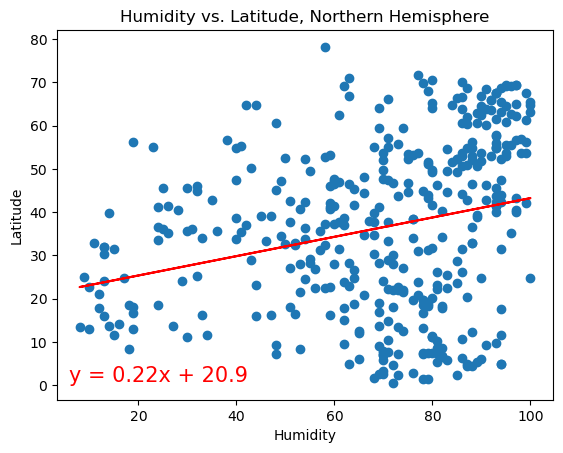

In [17]:
# Northern Hemisphere
plt.title("Humidity vs. Latitude, Northern Hemisphere")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
linear_regression(northern_hemi_df["Humidity"], northern_hemi_df["Lat"])

The correlation is: 0.33
The r-squared is: 0.10837139664175414


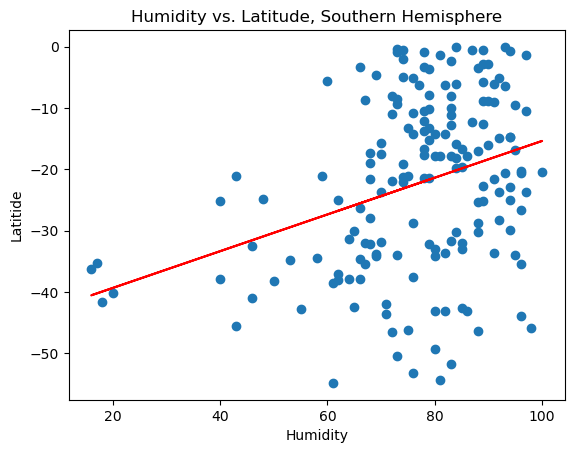

In [18]:
# Southern Hemisphere
plt.title("Humidity vs. Latitude, Southern Hemisphere")
plt.xlabel("Humidity")
plt.ylabel("Latitide")
linear_regression(southern_hemi_df["Humidity"], southern_hemi_df["Lat"])

**Discussion about the linear relationship:** There isn't a significantly meaningful relationship between Humidity and Latitude

### Cloudiness vs. Latitude Linear Regression Plot

The correlation is: 0.18
The r-squared is: 0.031298905359117356


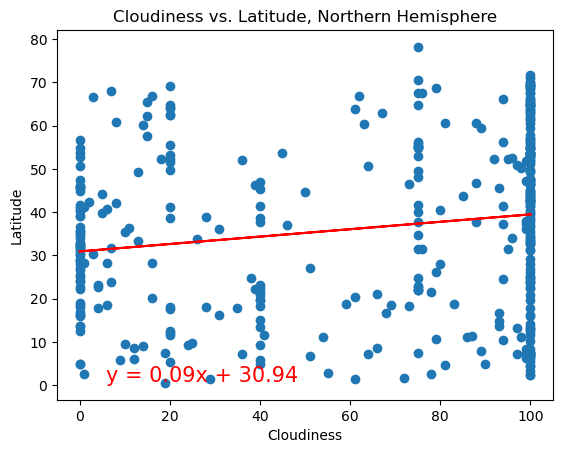

In [19]:
# Northern Hemisphere
plt.title("Cloudiness vs. Latitude, Northern Hemisphere")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
linear_regression(northern_hemi_df["Cloudiness"], northern_hemi_df["Lat"])

The correlation is: 0.12
The r-squared is: 0.015281202929611186


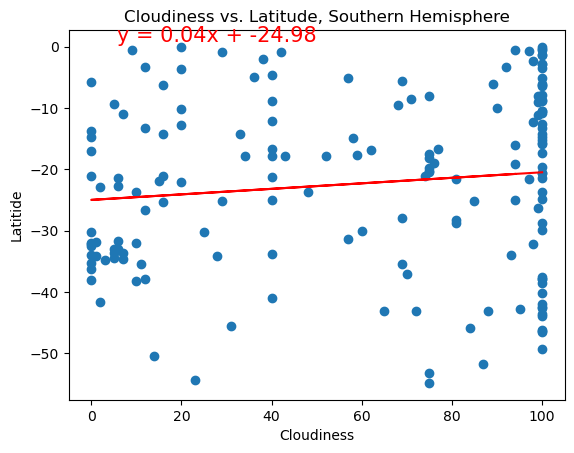

In [20]:
# Southern Hemisphere
# Southern Hemisphere
plt.title("Cloudiness vs. Latitude, Southern Hemisphere")
plt.xlabel("Cloudiness")
plt.ylabel("Latitide")
linear_regression(southern_hemi_df["Cloudiness"], southern_hemi_df["Lat"])

**Discussion about the linear relationship:** There isn't a significantly meaningful relationship between Cloudiness and Latitude

### Wind Speed vs. Latitude Linear Regression Plot

The correlation is: 0.02
The r-squared is: 0.000230931794367725


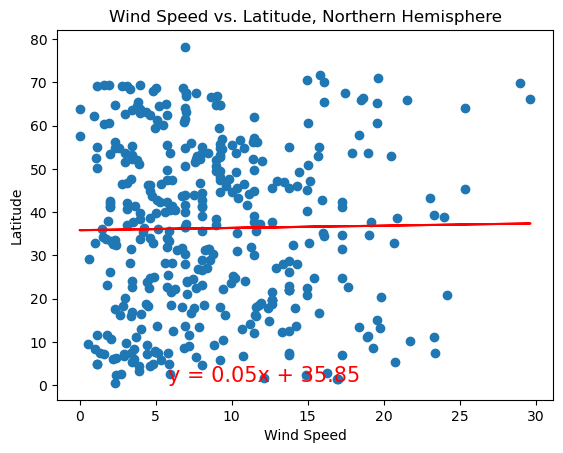

In [21]:
# Northern Hemisphere
plt.title("Wind Speed vs. Latitude, Northern Hemisphere")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
linear_regression(northern_hemi_df["Wind Speed"], northern_hemi_df["Lat"])

The correlation is: -0.1
The r-squared is: 0.009685277092028497


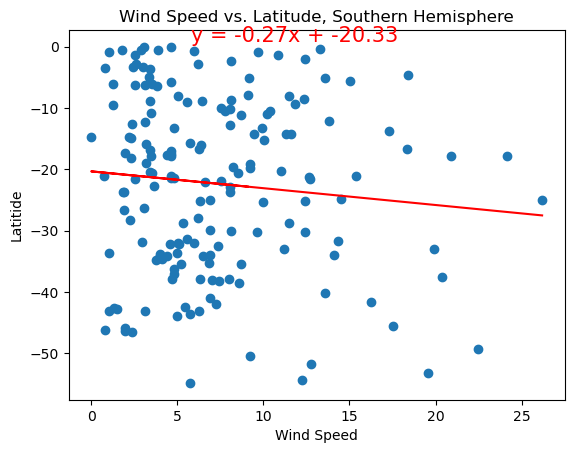

In [22]:
# Southern Hemisphere
# Southern Hemisphere
plt.title("Wind Speed vs. Latitude, Southern Hemisphere")
plt.xlabel("Wind Speed")
plt.ylabel("Latitide")
linear_regression(southern_hemi_df["Wind Speed"], southern_hemi_df["Lat"])

**Discussion about the linear relationship:** There isn't a significantly meaningful relationship between Wind Speed and Latitude